[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sjacob/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sjacob/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Please provide the name of the Company or a Ticker: Auro labs
Searching for and analyzing Auro labs, Please be patient, it might take a while...
                                               title                    media  \
0  Stocks in the news: LIC, Apollo Hospitals, Bat...       The Economic Times   
1   Stocks that will see action on February 13, 2023  The Hindu Business Line   
2  Divis Laboratories Ltd posts consolidated Q3FY...          EquityBulls.com   
3  Stocks in the news: Paytm, Wipro, Auro Pharma,...       The Economic Times   
4            Auro-3D Acquired by Private Equity Firm                Mixonline   
5  Dr Lal Path Labs Ltd reports Rs. 71.7 crores c...          EquityBulls.com   
6  The Jackson Laboratory Announces Acquisition o...            Business Wire   
7  Aurobindo Pharmas arm to invest around Rs 300 ...        Business Standard   
8            Jyothy Labs Ltd updates on amalgamation          EquityBulls.com   
9              For Brands, Impact Is The New 

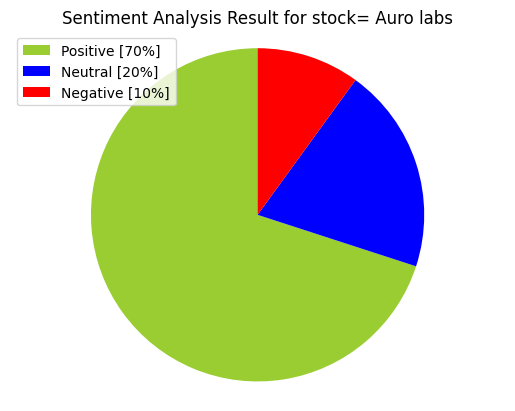

Wordcloud for Auro labs


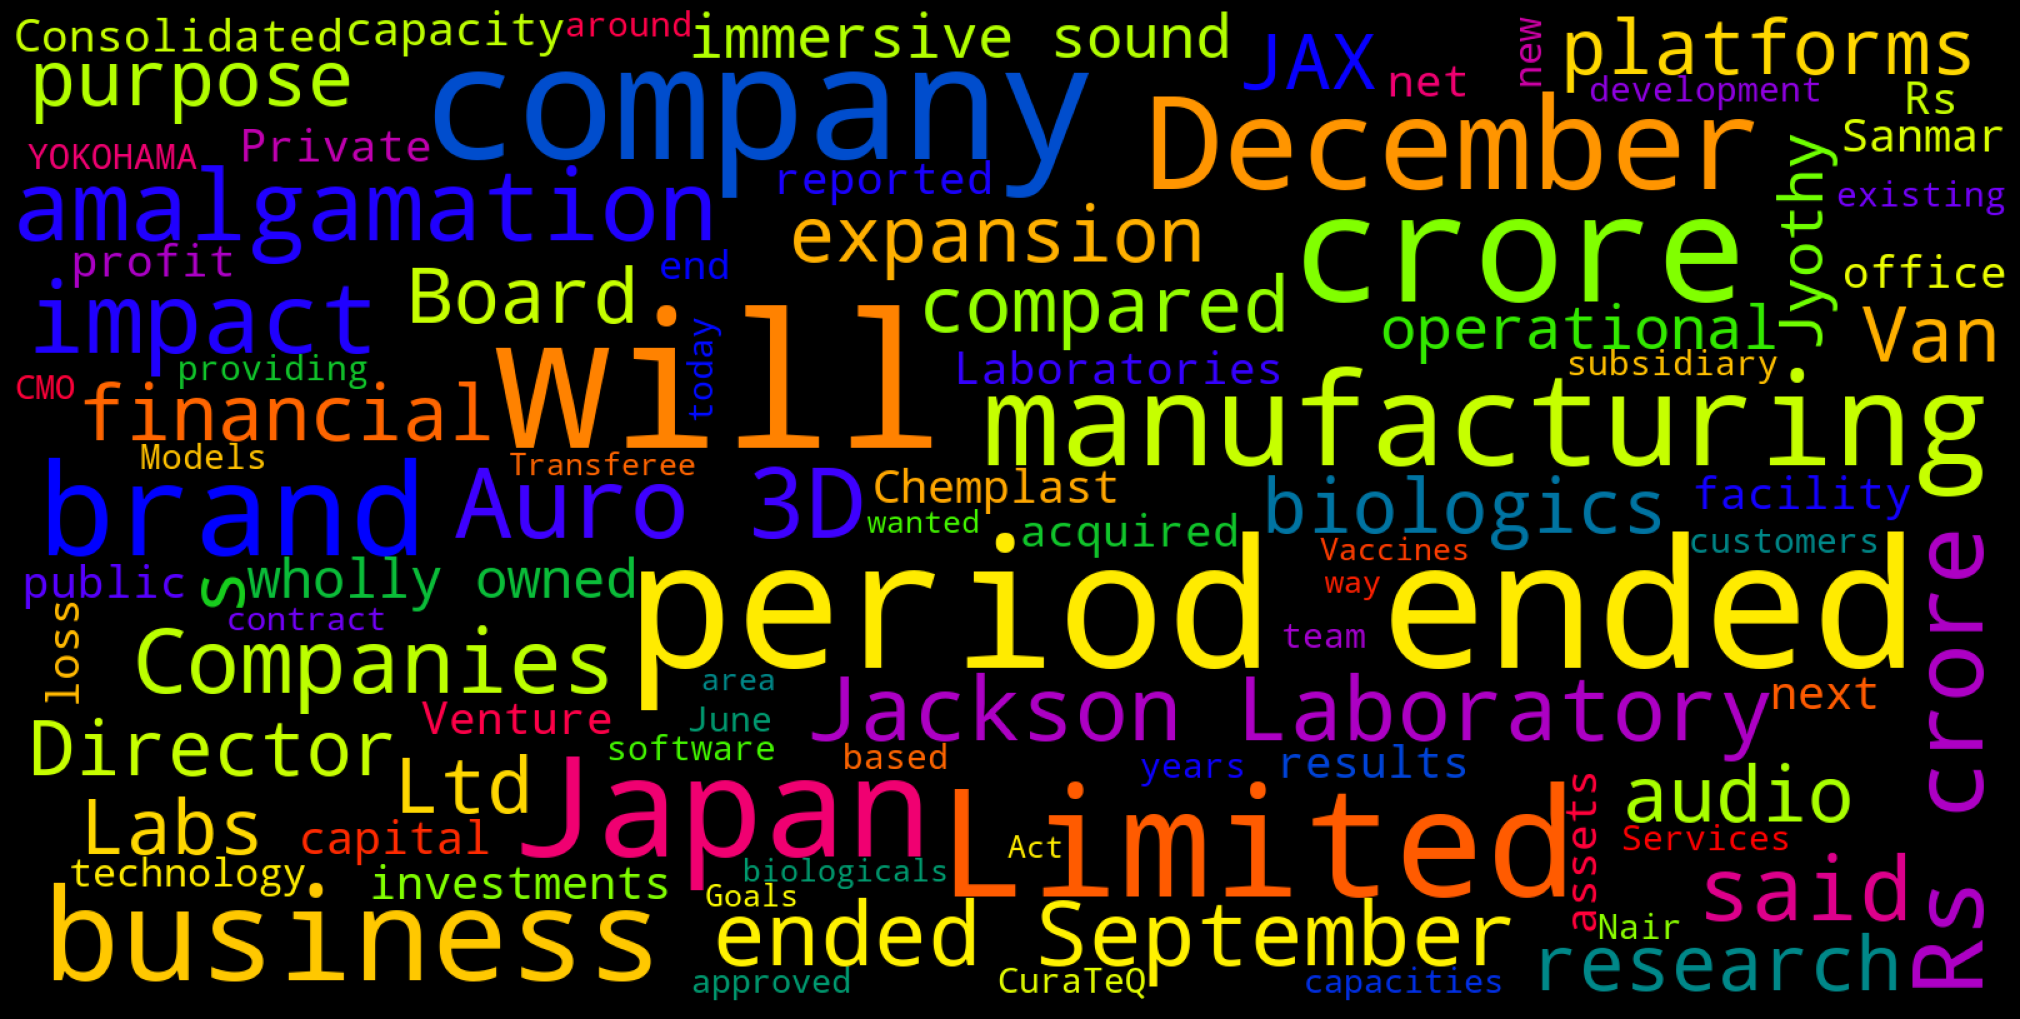

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
from wordcloud import WordCloud, STOPWORDS

nltk.download('vader_lexicon') #required for Sentiment Analysis


now = dt.date.today()
now = now.strftime('%m-%d-%Y')
yesterday = dt.date.today() - dt.timedelta(days = 1)
yesterday = yesterday.strftime('%m-%d-%Y')

nltk.download('punkt')
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 10
# save the company name in a variable
company_name = input("Please provide the name of the Company or a Ticker: ")
#As long as the company name is valid, not empty...
if company_name != '':
    print(f'Searching for and analyzing {company_name}, Please be patient, it might take a while...')

    #Extract News with Google News
    googlenews = GoogleNews(start='10/10/2021',end=now)
    googlenews.search(company_name)
    result = googlenews.result()
    #store the results
    df = pd.DataFrame(result)
    print(df)
    
try:
    list =[] #creating an empty list 
    for i in df.index:
        dict = {} #creating an empty dictionary to append an article in every single iteration
        article = Article(df['link'][i],config=config) #providing the link
        try:
          article.download() #downloading the article 
          article.parse() #parsing the article
          article.nlp() #performing natural language processing (nlp)
        except:
           pass 
        #storing results in our empty dictionary
        dict['Date']=df['date'][i] 
        dict['Media']=df['media'][i]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        dict['Key_words']=article.keywords
        list.append(dict)
    check_empty = not any(list)
    # print(check_empty)
    if check_empty == False:
      news_df=pd.DataFrame(list) #creating dataframe
      print(news_df)

except Exception as e:
    #exception handling
    print("exception occurred:" + str(e))
    print('Looks like, there is some error in retrieving the data, Please try again or try with a different ticker.' )
    
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
news_list = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for news in news_df['Summary']:
    news_list.append(news)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(news)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(news) #appending the news that satisfies this condition
        negative += 1 #increasing the count by 1
    elif pos > neg:
        positive_list.append(news) #appending the news that satisfies this condition
        positive += 1 #increasing the count by 1
    elif pos == neg:
        neutral_list.append(news) #appending the news that satisfies this condition
        neutral += 1 #increasing the count by 1 

positive = percentage(positive, len(news_df)) #percentage is the function defined above
negative = percentage(negative, len(news_df))
neutral = percentage(neutral, len(news_df))

#Converting lists to pandas dataframe
news_list = pd.DataFrame(news_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n')

#Creating PieCart
labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for stock= "+company_name+"" )
plt.axis('equal')
plt.show()

# Word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([nws for nws in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for ' + company_name)
word_cloud(news_df['Summary'].values)

In [90]:
news_df

,Date,Media,Title,Article,Summary,Key_words
0,2-Aug-2022,The Economic Times,,,,[]
1,1 month ago,The Hindu Business Line,"Stocks that will see action on February 13, 2023",Chemplast Sanmar Ltd has earmarked a capital o...,Chemplast Sanmar Ltd has earmarked a capital o...,"[13, india, infrastructure, crore, 2023, power..."
2,1 month ago,EquityBulls.com,Divis Laboratories Ltd posts consolidated Q3FY...,Divi's Laboratories Limited has reported Conso...,Divi's Laboratories Limited has reported Conso...,"[crores, ended, profit, laboratories, net, con..."
3,7-Nov-2022,The Economic Times,,,,[]
4,5-Jul-2022,Mixonline,Auro-3D Acquired by Private Equity Firm,"Mol, Belgium (July 25, 2022)—Private equity fi...","Mol, Belgium (July 25, 2022)—Private equity fi...","[acquired, osselaer, auro3d, sound, audio, tec..."
5,8-Nov-2022,EquityBulls.com,Dr Lal Path Labs Ltd reports Rs. 71.7 crores c...,Dr. Lal Path Labs Ltd. has reported Consolidat...,Dr. Lal Path Labs Ltd. has reported Consolidat...,"[crores, q2fy23, labs, ended, 30, net, consoli..."
6,2-Oct-2021,Business Wire,The Jackson Laboratory Announces Acquisition o...,"FARMINGTON, Conn. & YOKOHAMA, Japan--(BUSINESS...","FARMINGTON, Conn. & YOKOHAMA, Japan--(BUSINESS...","[models, laboratories, jackson, announces, riv..."
7,1-Sept-2022,Business Standard,Aurobindo Pharma's arm to invest around Rs 300...,"on Thursday said its wholly-owned arm, CuraTeQ...","on Thursday said its wholly-owned arm, CuraTeQ...","[capacity, aurobindo, 300, contract, cr, busin..."
8,2-Sept-2022,EquityBulls.com,Jyothy Labs Ltd updates on amalgamation,The Board of Directors of Jyothy Labs Limited ...,The Board of Directors of Jyothy Labs Limited ...,"[transferor, labs, companies, jyothy, business..."
9,10-Oct-2022,The Drum,"For brands, impact is the new purpose",Purpose statements are no longer enough. As pa...,Online platforms act as public megaphones of b...,"[sdg, brands, society, business, stanley, goal..."


In [91]:
print(negative_list.to_string())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   0
0  Chemplast Sanmar Ltd has earmarked a capital outlay of ₹680 crore to be spent over the next 15 months towards capacity expansion.\nThe investments include kick-starting the next phase of expansion of its custom manufacturing multi-purpose facility, Chemplast Sanmar Ltd sa

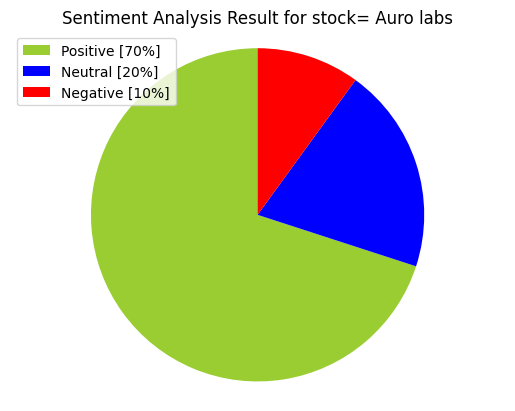

In [92]:
labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for stock= "+company_name+"" )
plt.axis('equal')
plt.show()

# Word cloud vis

In [96]:
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm
start = datetime.datetime(2017, 1, 1)
import yfinance as yf
import cufflinks as cf

t="AUROLAB.BO"
t= "TANLA.NS"
citi = yf.download(t,period="4y")

[*********************100%***********************]  1 of 1 completed


In [97]:
import numpy as np
import pandas as pd
from hmmlearn import hmm

# Load data from CSV file
data = citi

# Define HMM model
model = hmm.GaussianHMM(n_components=2, covariance_type="full")

# Fit the model
model.fit(data)

# Predict the hidden states
hidden_states = model.predict(data)

# Print the hidden states and corresponding stock trends
latest_trend = np.where(hidden_states[-1]==0, "Bullish", "Bearish")
print("Latest Trend: ", latest_trend)

Latest Trend:  Bullish


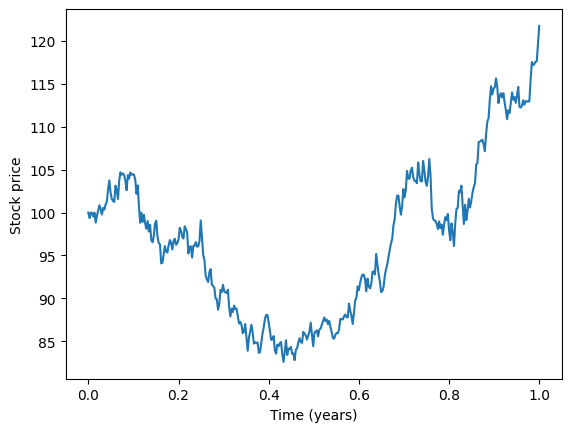

In [121]:


import numpy as np

# Parameters
mu = 0.05
sigma = 0.2
S0 = 100
T = 1  # Time horizon
N = 365  # Number of time steps
dt = T / N  # Time step size

# Initialize arrays
t = np.zeros(N+1)
S = np.zeros(N+1)
S[0] = S0

# Generate normal random variables
Z = np.random.standard_normal(N)

# Euler-Maruyama method
for i in range(1, N+1):
    t[i] = t[i-1] + dt
    S[i] = S[i-1] + mu*S[i-1]*dt + sigma*S[i-1]*np.sqrt(dt)*Z[i-1]

# Plot the stock price
import matplotlib.pyplot as plt
plt.plot(t, S)
plt.xlabel('Time (years)')
plt.ylabel('Stock price')
plt.show()

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

data = citi['Adj Close']
data.dropna(inplace=True)

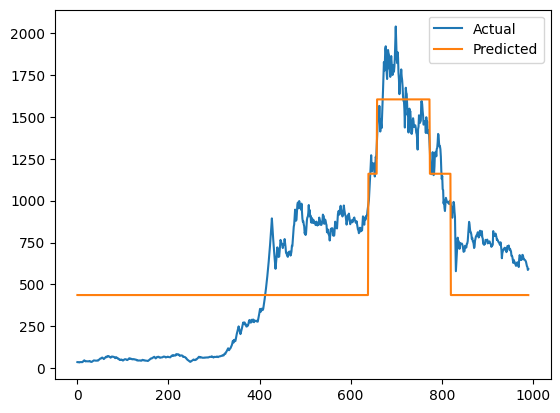

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

data = citi['Adj Close']
data.dropna(inplace=True)

# Train HMM model
n_states = 4
model = hmm.GaussianHMM(n_components=n_states)
model.fit(data.values.reshape(-1, 1))

# Make predictions
predicted_states = model.predict(data.values.reshape(-1, 1))
predicted_prices = np.zeros_like(data.values)
for i in range(n_states):
    mask = predicted_states == i
    predicted_prices[mask] = np.mean(data[mask])

# Plot actual and predicted prices
plt.plot(data.values)
plt.plot(predicted_prices)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [85]:
 predicted_prices[-3:]

array([436.88890936, 436.53081593, 436.53081593])

In [86]:
citi.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-13,633.200012,635.900024,617.500000,620.000000,620.000000,179385
2023-03-14,620.049988,627.000000,604.000000,608.799988,608.799988,224015
2023-03-15,611.299988,620.000000,601.099976,604.299988,604.299988,161573
2023-03-16,603.000000,603.000000,583.000000,586.349976,586.349976,378693
2023-03-17,592.000000,605.000000,584.599976,591.750000,591.750000,260696


In [103]:
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup

# Set stock ticker symbol
symbol = "TANLA.NS"

# Scrape news articles from Yahoo Finance
url = f"https://finance.yahoo.com/quote/{symbol}/news?p={symbol}"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")
articles = soup.find_all("h3", class_="Mb(5px)")

# Loop through articles and perform sentiment analysis
sentiments = []
for article in articles:
    # Get article title and link
    title = article.text
    link = article.a.get("href")
    
    # Scrape article text
    html = requests.get(link).text
    soup = BeautifulSoup(html, "html.parser")
    paragraphs = soup.find_all("p")
    text = " ".join([p.text for p in paragraphs])
    
    # Perform sentiment analysis
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)
if len(sentiments) == 0:
    length = 1
else:
    length = len(sentiments)
# Calculate average sentiment
avg_sentiment = sum(sentiments) / length

# Print results
print(f"Stock: {symbol}")
print(f"Average Sentiment: {avg_sentiment}")

Stock: TANLA.NS
Average Sentiment: 0.0


In [118]:
import requests
from textblob import TextBlob

# News API configuration
NEWS_API_KEY = '84e087eaf5fc49008f76195f3cc09d94'
STOCK_SYMBOL = 'TANLA platforms'
NEWS_API_ENDPOINT = 'https://newsapi.org/v2/everything'

# Define search parameters for news articles
search_params = {
    'q': STOCK_SYMBOL,
    'sortBy': 'relevancy',
    'language': 'en',
    'pageSize': 100,
    'apiKey': NEWS_API_KEY
}

# Send request to News API and get response
response = requests.get(NEWS_API_ENDPOINT, params=search_params)

# Parse response JSON and get article titles
articles = response.json()['articles']
titles = [article['title'] for article in articles]

# Perform sentiment analysis on article titles
polarity_scores = [TextBlob(title).sentiment.polarity for title in titles]

# Print results
print("Search Results for Stock Symbol: ", STOCK_SYMBOL)
print("Number of Articles: ", len(titles))
positive_articles = sum(score > 0 for score in polarity_scores)
negative_articles = sum(score <= 0 for score in polarity_scores)
print("Positive Articles: ", positive_articles)
print("Negative Articles: ", negative_articles)

Search Results for Stock Symbol:  TANLA platforms
Number of Articles:  7
Positive Articles:  1
Negative Articles:  6


In [119]:
titles

['MWC 2023: Tanla unveils its Wisely ATP phishing protection solution with 99 per cent accuracy',
 'Around 5 lakh people potentially fall victim to phishing scams in India: report',
 'Around 500,000 people potential victims to phishing scam in India: Tanla',
 'Trai pins hope on artificial intelligence-driven solution to tackle SMS-driven phishing in India',
 'Mobile users may get relief from spam texts',
 'Pesky calls: Trai to launch a digital consent authorisation platform soon',
 'Telcos mull deploying AI to check pesky calls amidst surge in fraud']

In [120]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Define the company to search news for
company = "Tanla platforms"

# Set up a list to store the compound polarity scores for each article
scores = []

# Scrape news articles for the company from Google News
url = f"https://news.google.com/search?q={company}&hl=en-US&gl=US&ceid=US%3Aen"
html = requests.get(url).content
soup = BeautifulSoup(html, "html.parser")
articles = soup.find_all("article")

# Analyze the sentiment of each article and store the compound score in the scores list
analyzer = SentimentIntensityAnalyzer()
for article in articles:
    headline = article.find("h3").get_text()
    text = article.find("div", class_="Da10Tb")
    if text:
        full_text = headline + " " + text.get_text()
        polarity_scores = analyzer.polarity_scores(full_text)
        sentiment = get_sentiment_label(polarity_scores)
        print(headline)
        print("Sentiment: ", sentiment)
        print("Polarity Scores: ", polarity_scores)

# Calculate the total sentiment score for the company based on the compound polarity scores
total_score = sum(scores)

# Print the total sentiment score
print("Total Sentiment Score: ", total_score)

Total Sentiment Score:  0


Optimal Portfolio: (0, 1) , Optimal Portfolio Value: 0


In [127]:
class TradingEnvironment:
    def __init__(self, df, initial_portfolio_value):
        self.prices = np.array(df['Close'])
        self.initial_portfolio_value = initial_portfolio_value
        self.portfolio_value = initial_portfolio_value
        self.portfolio = [0, 0, initial_portfolio_value / self.prices[0]]

    def step(self, action):
        # Calculate portfolio value after taking action
        if action == 0:
            # Buy
            self.portfolio[0] = self.portfolio_value / self.prices[self.portfolio[2]]
            self.portfolio_value = 0
        elif action == 1:
            # Sell
            self.portfolio_value = self.prices[self.portfolio[2]] * self.portfolio[0]
            self.portfolio[0] = 0
        else:
            # Hold
            pass
        # Update portfolio state
        self.portfolio[1] = self.portfolio_value / self.prices[self.portfolio[2]]
        # Update price index
        self.portfolio[2] += 1
        # Calculate reward
        reward = self.portfolio_value + self.prices[self.portfolio[2]] * self.portfolio[0] - self.initial_portfolio_value
        # Check if episode is done
        done = self.portfolio[2] == len(self.prices) - 1
        # Return new state, reward, and done flag
        return self.portfolio, reward, done
    
    
def q_learning(env, n_episodes=1000, alpha=0.1, gamma=0.99, epsilon=0.1):
    # Initialize Q-table
    q_table = np.zeros((len(env.prices) - 1, 2, 3))
    # Loop over episodes
    for i in range(n_episodes):
        # Initialize state
        state = env.portfolio
        # Loop over time steps within episode
        done = False
        while not done:
            # Choose action
            if np.random.random() < epsilon:
                action = np.random.choice([0, 1, 2])
            else:
                action = np.argmax(q_table[state[1], state[0] > 0, :])
            # Take action and observe new state and reward
            new_state, reward, done = env.step(action)
            # Update Q-table
            q_table[state[1], state[0] > 0, action] += alpha * (reward + gamma * np.max(q_table[new_state[1], new_state[0] > 0, :]) - q_table[state[1], state[0] > 0, action])
            # Update state
            state = new_state
    return q_table


In [128]:
def portfolio_optimization(q_table, prices):
    # Find optimal portfolio
    optimal_portfolio = np.argmax(q_table[:, :, 2], axis=1)
    # Calculate total value of portfolio at the end of the trading period
    total_portfolio_value = prices[optimal_portfolio[-1]] * (q_table[optimal_portfolio[-1], 0, 2] + q_table[optimal_portfolio[-1], 1, 2])
    # Determine trend based on whether portfolio value is increasing or decreasing
    trend = 'bullish' if total_portfolio_value > prices[optimal_portfolio[-1]] * (q_table[optimal_portfolio[-2], 0, 2] + q_table[optimal_portfolio[-2], 1, 2]) else 'bearish'
    return trend

<AxesSubplot:xlabel='Date'>

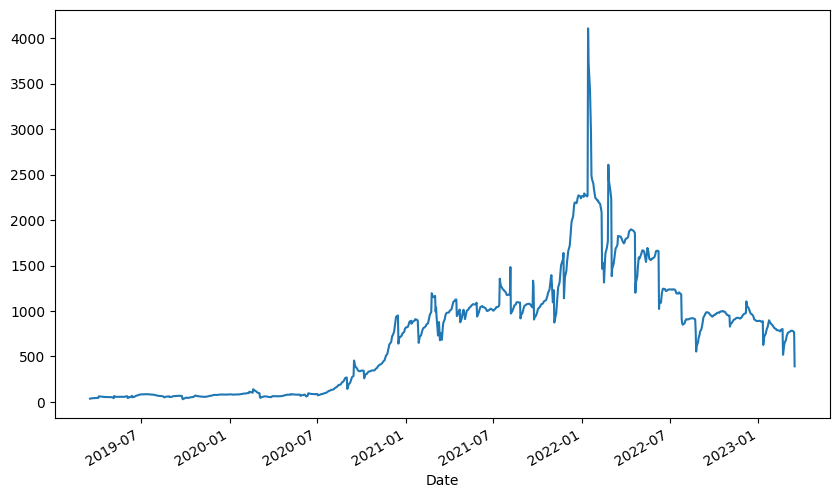

In [136]:
import numpy as np
import pandas as pd
from scipy.stats import norm, poisson

def jump_diffusion_model(prices, r, sigma, lamb, mu, delta):
    # Calculate log returns and drift component
    returns = np.log(prices).diff().dropna()
    drift = r - sigma**2/2 - lamb * (np.exp(mu + delta**2/2) - 1)
    
    # Calculate jump component
    jump_size = poisson.rvs(lamb, size=len(returns))
    jump = np.exp(np.random.normal(mu, delta, size=len(returns))) - 1
    
    # Calculate new prices
    new_prices = prices.shift(1) * np.exp(drift + sigma * returns + jump_size * jump)
    new_prices.iloc[0] = prices.iloc[0]
    
    return new_prices

# Example usage:
# Generate 1000 days of stock prices with jump diffusion
prices = citi['Adj Close']
for i in range(1, len(prices)):
    prices.iloc[i] = jump_diffusion_model(prices.iloc[:i+1], r=0.05, sigma=0.2, lamb=0.1, mu=-0.2, delta=0.3).iloc[-1]

# Plot the resulting prices
prices.plot(figsize=(10,6))

In [139]:
prices.tail()

Date
2023-03-13    781.293161
2023-03-14    776.981699
2023-03-15    772.402717
2023-03-16    764.136704
2023-03-17    391.513330
Name: Adj Close, dtype: float64

In [140]:
citi.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-13,633.200012,635.900024,617.500000,620.000000,781.293161,179385
2023-03-14,620.049988,627.000000,604.000000,608.799988,776.981699,224015
2023-03-15,611.299988,620.000000,601.099976,604.299988,772.402717,161573
2023-03-16,603.000000,603.000000,583.000000,586.349976,764.136704,378693
2023-03-17,592.000000,605.000000,584.599976,591.750000,391.513330,260696
